### Analysis of Software Professionals Dataset

#### Part 1

In this first part, I worked with a datasets containing information of over 20k Software Professionals with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Setup:** I imported the necessary libraries and loaded the .csv file to a DataFrame named `sps` and first of all I checked that all columns have the correct data type.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [ ]:
sps = pd.read_csv('Software Professionals Salary.csv')
sps

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [ ]:
print(sps.dtypes)

Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object


1. Shape (rows, cols) of the `sps` DataFrame

In [ ]:
sps.shape

(22770, 8)

2. Number of unique `Job Roles` in the dataset

In [ ]:
sps['Job Roles'].nunique()

11

In [ ]:
sps['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

3. Number of unique `Job Title` for the "Python" `Job Role`

In [ ]:
sps[sps['Job Roles'] == 'Python']['Job Title'].nunique()

102

4. Number of the `Company Name`s that have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"

In [ ]:
sps[(sps['Job Roles'] == 'Python') & (sps['Job Title'].str.contains('Analyst'))].groupby('Company Name').size()


Company Name
Infosys                1
Ocwen Financial        1
TrioHats Consulting    1
dtype: int64

There are **3** companies that have a **Python Job Role** with a Job Title containing the substring **Analyst** (more informations below).

In [ ]:
filtered_data = sps[(sps['Job Roles'] == 'Python') & (sps['Job Title'].str.contains('Analyst'))]
filtered_data

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
11352,3.7,Ocwen Financial,Python Analyst,500000,1,Bangalore,Full Time,Python
11371,4.0,TrioHats Consulting,Python and Machine Learning Analyst,100000,1,Bangalore,Full Time,Python
11541,3.3,Infosys,Technology Analyst - Python Developer,600000,1,Chennai,Full Time,Python


5. `Company Name` that has the highest number of `Salaries Reported` (across all `Job Title`s)

In [ ]:
grouped_data = sps.groupby('Company Name')['Salaries Reported'].sum().reset_index()
highest_salary_reported = grouped_data.sort_values('Salaries Reported', ascending=False).head(1)
highest_salary_reported

,Company Name,Salaries Reported
660,Amazon,2636


The company that have **the highest number of Salaries Reported** (across all Job Titles) is **Amazon** with **2636**.

6. Number of `Location`s of previous company

In [ ]:
sps.loc[sps['Company Name'] == 'Amazon']['Location'].nunique()

9

**Amazon** is present in **9** locations.

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service I created a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. *Note: of course, this result will change in time*

In [ ]:
r = requests.get('https://open.er-api.com/v6/latest/INR')
data = r.json()
exchange_rate = data['rates']['USD']

sps['Salary USD'] = sps['Salary'] * exchange_rate
sps['Salary USD'] = sps['Salary USD'].round(0)

print(f"Exchange rate from INR to USD (12/06/23): {exchange_rate}")

print(sps[['Salary', 'Salary USD']])


Exchange rate from INR to USD (12/06/23): 0.012123
        Salary  Salary USD
0       400000      4849.0
1       400000      4849.0
2      1000000     12123.0
3       300000      3637.0
4       600000      7274.0
...        ...         ...
22765   200000      2425.0
22766   300000      3637.0
22767   192000      2328.0
22768   300000      3637.0
22769   300000      3637.0

[22770 rows x 2 columns]


8. Average `Salary USD` for the "Python" `Job Role`

In [ ]:
avg_salaryUSD_python = sps[sps['Job Roles'] == 'Python']['Salary USD'].mean()
avg_salaryUSD_python

5892.108764519536

The **salary USD** for the **Python Job** **Role** is **$ 5892,11**.

9. `Company Name` with the highest **average** `Salary USD` across all `Job Title`s

In [ ]:
company_avg_salaryUSD = sps.groupby('Company Name')['Salary USD'].mean().reset_index()
highest_avg_salaryUSD = company_avg_salaryUSD.sort_values('Salary USD', ascending=False).head(1)
highest_avg_salaryUSD

,Company Name,Salary USD
9414,Thapar University,1091070.0


10. I createed a plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`

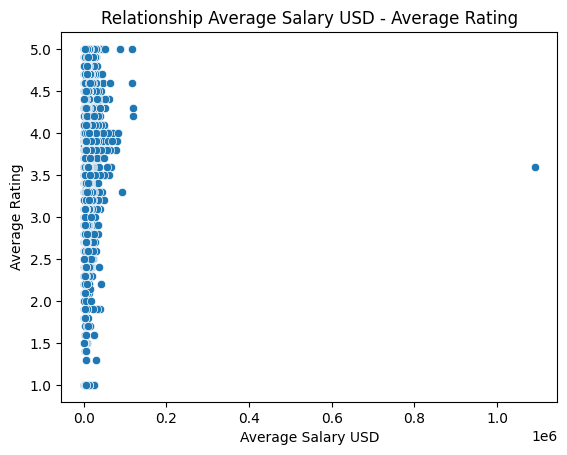

In [ ]:
company_avg_salary_rating = sps.groupby('Company Name')[['Salary USD', 'Rating']].mean()

sns.scatterplot(data=company_avg_salary_rating, x='Salary USD', y='Rating')

plt.xlabel('Average Salary USD')
plt.ylabel('Average Rating')
plt.title('Relationship Average Salary USD - Average Rating')

plt.show()

In [ ]:
oddity_company = company_avg_salary_rating['Salary USD'].idxmax()

print(oddity_company)

Thapar University


**Thapar University** has **the highest average salary USD** (**$ 1091070**) and this is the oddity in the plot.